### Importação dos dados



In [156]:
! pip install folium


In [157]:
import pandas as pd
import matplotlib.pyplot as plt
import folium
from folium import plugins
url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_1.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science/refs/heads/main/base-de-dados-challenge-1/loja_4.csv"

loja = pd.read_csv(url)
loja2 = pd.read_csv(url2)
loja3 = pd.read_csv(url3)
loja4 = pd.read_csv(url4)

loja.head()

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38


#1. Análise do faturamento



In [126]:
faturamento_loja_1 = sum(loja["Preço"])
faturamento_loja_2 = sum(loja2["Preço"])
faturamento_loja_3 = sum(loja3["Preço"])
faturamento_loja_4 = sum(loja4["Preço"])



In [127]:
dados_faturamento = {'Loja': ['Loja 1','Loja 2','Loja 3','Loja 4'],'Faturamento':[faturamento_loja_1,faturamento_loja_2,faturamento_loja_3,faturamento_loja_4]}
df_faturamento = pd.DataFrame(dados_faturamento).sort_values(by='Faturamento',ascending=False)
df_faturamento

,Loja,Faturamento
0,Loja 1,1534509.12
1,Loja 2,1488459.06
2,Loja 3,1464025.03
3,Loja 4,1384497.58


<Axes: xlabel='Loja'>

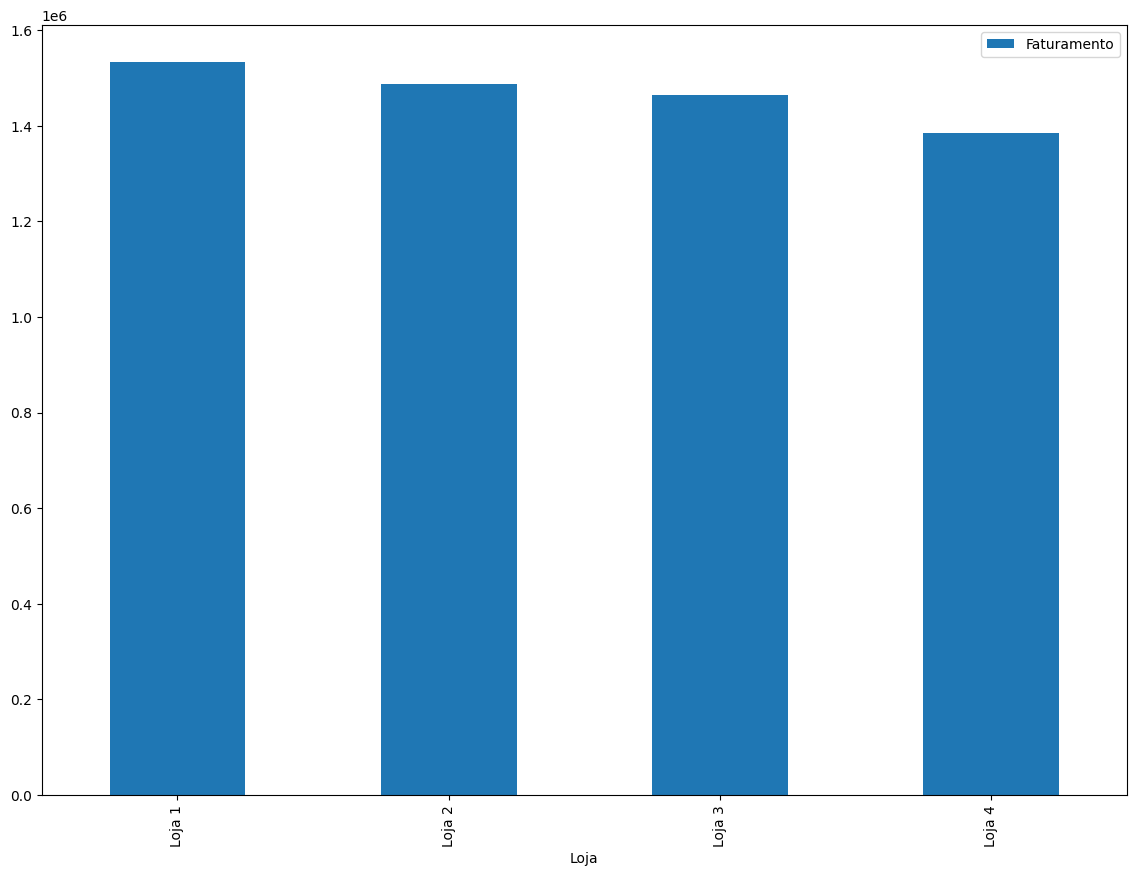

In [128]:
df_faturamento.plot(kind='bar',figsize=(14,10),x='Loja',y='Faturamento')

# 2. Vendas por Categoria

In [198]:
categoria_loja_1 = loja.groupby('Categoria do Produto').size().rename('Loja 1')
categoria_loja_2 = loja2.groupby('Categoria do Produto').size().rename('Loja 2')
categoria_loja_3 = loja3.groupby('Categoria do Produto').size().rename('Loja 3')
categoria_loja_4 = loja4.groupby('Categoria do Produto').size().rename('Loja 4')

In [197]:
vendas_por_categoria = {'Loja 1': categoria_loja_1,'Loja 2': categoria_loja_2,'Loja 3':categoria_loja_3,'Loja 4':categoria_loja_4}
df_vendas_por_categoria = pd.DataFrame(vendas_por_categoria)
df_vendas_por_categoria

,Loja 1,Loja 2,Loja 3,Loja 4
Categoria do Produto,,,,
brinquedos,324,313,315,338
eletrodomesticos,312,305,278,254
eletronicos,448,422,451,451
esporte e lazer,284,275,277,277
instrumentos musicais,182,224,177,170
livros,173,197,185,187
moveis,465,442,499,480
utilidades domesticas,171,181,177,201


array([<Axes: ylabel='Loja 1'>, <Axes: ylabel='Loja 2'>,
       <Axes: ylabel='Loja 3'>, <Axes: ylabel='Loja 4'>], dtype=object)

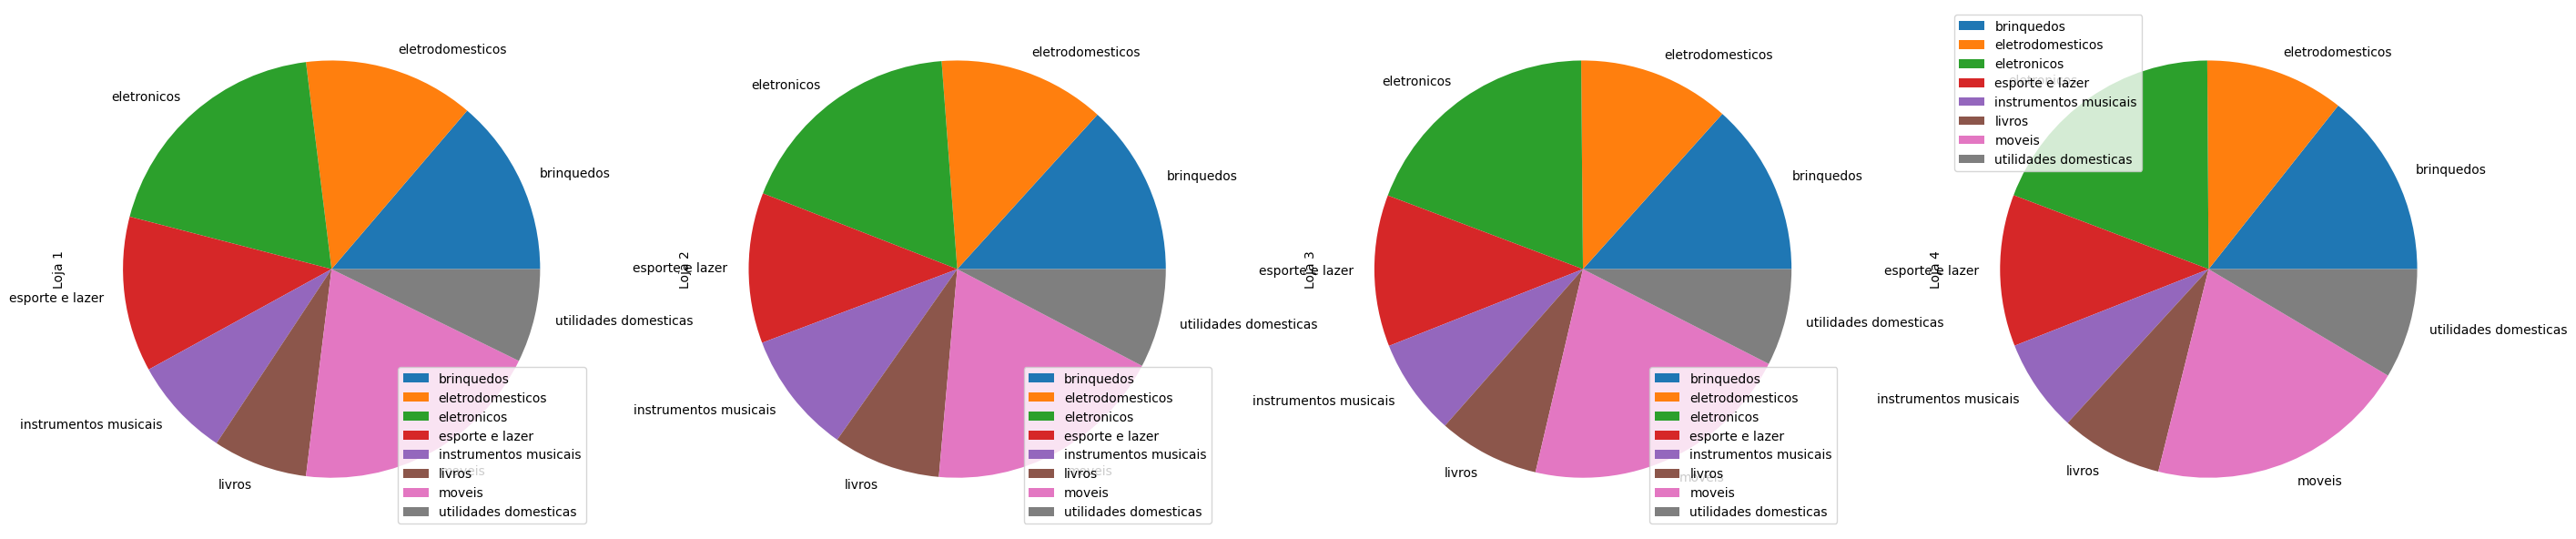

In [131]:
df_vendas_por_categoria.plot(kind='pie',figsize=(34,30),subplots=True)

# 3. Média de Avaliação das Lojas


In [132]:
avaliacao_loja_1 = loja["Avaliação da compra"].mean()
avaliacao_loja_2 = loja2["Avaliação da compra"].mean()
avaliacao_loja_3 = loja3["Avaliação da compra"].mean()
avaliacao_loja_4 = loja4["Avaliação da compra"].mean()

In [133]:
dados_avaliacao = {'Loja': ['Loja 1','Loja 2','Loja 3','Loja 4'],'Avaliação média':[avaliacao_loja_1,avaliacao_loja_2,avaliacao_loja_3,avaliacao_loja_4]}
df_avaliacao = pd.DataFrame(dados_avaliacao).sort_values(by='Avaliação média',ascending=False)
df_avaliacao

,Loja,Avaliação média
2,Loja 3,4.048326
1,Loja 2,4.037304
3,Loja 4,3.995759
0,Loja 1,3.976685


<BarContainer object of 4 artists>

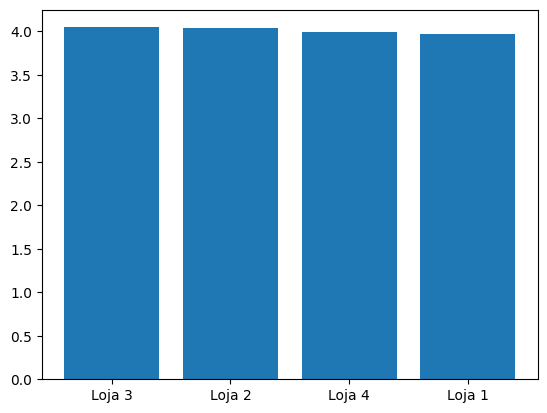

In [180]:
plt.bar(x=df_avaliacao['Loja'],height=df_avaliacao['Avaliação média'])

# 4. Produtos Mais e Menos Vendidos

In [203]:
pd.set_option('display.max_colwidth',None)

mais_vendidos_loja_1 = loja["Produto"].value_counts().sort_values(ascending=False).head(5)
mais_vendidos_loja_2 = loja2["Produto"].value_counts().sort_values(ascending=False).head(5)
mais_vendidos_loja_3 = loja3["Produto"].value_counts().sort_values(ascending=False).head(5)
mais_vendidos_loja_4 = loja4["Produto"].value_counts().sort_values(ascending=False).head(5)

menos_vendidos_loja_1= loja["Produto"].value_counts().sort_values(ascending=False).tail(5)
menos_vendidos_loja_2= loja2["Produto"].value_counts().sort_values(ascending=False).tail(5)
menos_vendidos_loja_3= loja3["Produto"].value_counts().sort_values(ascending=False).tail(5)
menos_vendidos_loja_4= loja4["Produto"].value_counts().sort_values(ascending=False).tail(5)

vendas_produtos = {'Loja' :["Loja 1",'Loja 2','Loja 3','Loja 4'],
                   'Produtos mais vendidos': [mais_vendidos_loja_1, mais_vendidos_loja_2, mais_vendidos_loja_3,mais_vendidos_loja_4],
                   'Produtos menos vendidos':[menos_vendidos_loja_1,menos_vendidos_loja_2,menos_vendidos_loja_3,menos_vendidos_loja_4,]}
df_vendas_produtos = pd.DataFrame(vendas_produtos)
df_vendas_produtos

,Loja,Produtos mais vendidos,Produtos menos vendidos
0,Loja 1,"Produto Micro-ondas 60 TV Led UHD 4K 60 Guarda roupas 60 Secadora de roupas 58 Cômoda 56 Name: count, dtype: int64","Produto Ciência de dados com python 39 Pandeiro 36 Panela de pressão 35 Headset 33 Celular ABXY 33 Name: count, dtype: int64"
1,Loja 2,"Produto Iniciando em programação 65 Micro-ondas 62 Bateria 61 Violão 58 Pandeiro 58 Name: count, dtype: int64","Produto Fone de ouvido 37 Poltrona 35 Mesa de jantar 34 Impressora 34 Jogo de tabuleiro 32 Name: count, dtype: int64"
2,Loja 3,"Produto Kit banquetas 57 Mesa de jantar 56 Cama king 56 Jogo de panelas 55 Cômoda 55 Name: count, dtype: int64","Produto Guitarra 38 Jogo de copos 36 Mochila 36 Micro-ondas 36 Blocos de montar 35 Name: count, dtype: int64"
3,Loja 4,"Produto Cama box 62 Faqueiro 59 Dashboards com Power BI 56 Cama king 56 Carrinho controle remoto 55 Name: count, dtype: int64","Produto Geladeira 38 Ciência de dados com python 38 Violão 37 Guarda roupas 34 Guitarra 33 Name: count, dtype: int64"


# 5. Frete Médio por Loja

In [136]:
frete_loja_1 = loja["Frete"].mean()
frete_loja_2 = loja2["Frete"].mean()
frete_loja_3 = loja3["Frete"].mean()
frete_loja_4 = loja4["Frete"].mean()

In [137]:
dados_frete = {'Loja': ['Loja 1','Loja 2','Loja 3','Loja 4'],'Valor médio do frete':[frete_loja_1,frete_loja_2,frete_loja_3,frete_loja_4]}
df_frete = pd.DataFrame(dados_frete).sort_values(by='Valor médio do frete',ascending=True)
df_frete

,Loja,Valor médio do frete
3,Loja 4,31.278997
2,Loja 3,33.074464
1,Loja 2,33.621941
0,Loja 1,34.691805


<BarContainer object of 4 artists>

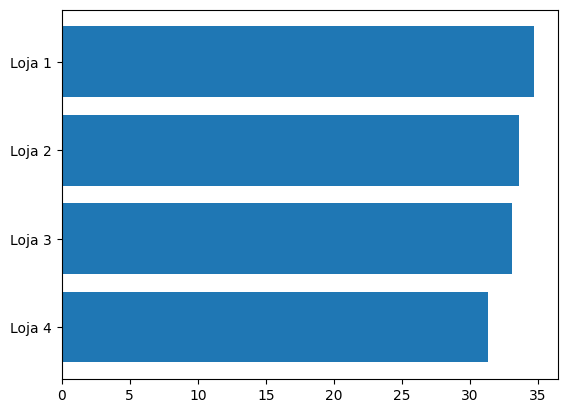

In [138]:
plt.barh(y=df_frete['Loja'],width=df_frete['Valor médio do frete'])

#6.  Análise de Desempenho Geográfico

In [193]:
vendas_estado_loja_1_counts = loja.groupby('Local da compra').size().rename('Loja 1')
vendas_estado_loja_2_counts = loja2.groupby('Local da compra').size().rename('Loja 2')
vendas_estado_loja_3_counts = loja3.groupby('Local da compra').size().rename('Loja 3')
vendas_estado_loja_4_counts = loja4.groupby('Local da compra').size().rename('Loja 4')

df_vendas_estados_por_loja = pd.concat([vendas_estado_loja_1_counts,
                                        vendas_estado_loja_2_counts,
                                        vendas_estado_loja_3_counts,
                                        vendas_estado_loja_4_counts],
                                       axis=1)

df_vendas_estados_por_loja = df_vendas_estados_por_loja.fillna(0).astype(int)
df_vendas_estados_por_loja

,Loja 1,Loja 2,Loja 3,Loja 4
Local da compra,,,,
AC,1,1,1,0
AL,15,13,7,6
AM,3,4,3,4
AP,4,0,2,3
BA,75,78,77,80
CE,32,40,44,35
DF,53,70,56,63
ES,38,34,57,42
GO,51,59,44,32


In [158]:
local_venda_loja_1 = loja[['lat','lon','Local da compra']]
local_venda_loja_2 = loja2[['lat','lon','Local da compra']]
local_venda_loja_3 = loja3[['lat','lon','Local da compra']]
local_venda_loja_4 = loja4[['lat','lon','Local da compra']]
df_vendas_mapa = pd.concat([local_venda_loja_1, local_venda_loja_2, local_venda_loja_3, local_venda_loja_4], ignore_index=True)
df_vendas_mapa = df_vendas_mapa.groupby(by=['Local da compra'],as_index=False).value_counts()
df_vendas_mapa.rename(columns={'count':'Vendas'},inplace=True)
df_vendas_mapa

,Local da compra,lat,lon,Vendas
0,AC,-8.77,-70.55,3
1,AL,-9.62,-36.82,41
2,AM,-3.47,-65.10,14
3,AP,1.41,-51.77,9
4,BA,-13.29,-41.71,310
5,CE,-5.20,-39.53,151
6,DF,-15.83,-47.86,242
7,ES,-19.19,-40.34,171
8,GO,-15.98,-49.86,186
9,MA,-5.42,-45.44,62


<Axes: title={'center': 'Distribuição Geográfica das Vendas'}, xlabel='latitude', ylabel='longitude'>

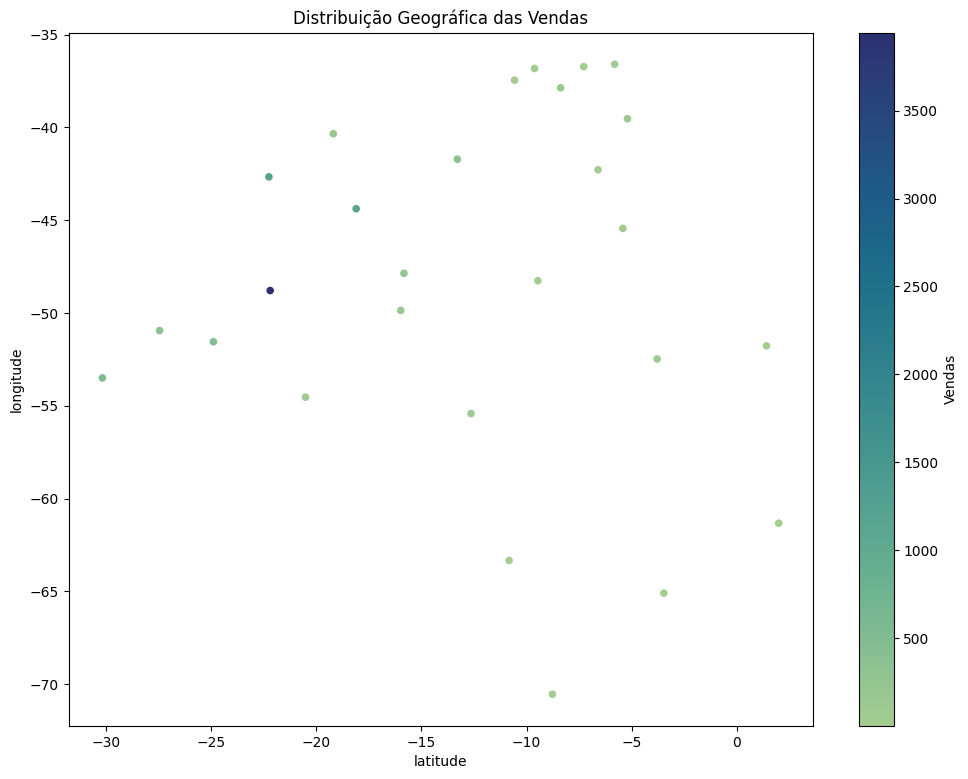

In [172]:
from numpy import size
df_vendas_mapa.plot.scatter(x='lat',y='lon',figsize=(12,9),cmap='crest',colorbar=True,xlabel='latitude', ylabel='longitude',
                    title='Distribuição Geográfica das Vendas',c='Vendas',)


In [176]:
mapa_vendas = folium.Map(location=(-15.78, -47.92),zoom_start=3)

In [177]:

for index, row in df_vendas_mapa.iterrows():
    folium.Marker(
        location=[row['lat'], row['lon']],
        popup=(
            f"Total de compras: {row['Vendas']}"
        ),
        icon=folium.Icon()
    ).add_to(mapa_vendas)

In [178]:
mapa_vendas

#7. Relatório Final

## 1. Introdução
Esse relatório sintetiza as descobertas da análise comparativa das quatro lojas, abordando o faturamento, as categorias e produtos de maior e menor venda, a satisfação do cliente (avaliações médias) e o custo logístico (frete médio)

## 2. Análise comparativa dos indicadores

###2.1 Faturamento total das lojas
| Loja | Faturamento |
|:--------:|:--------:|
| Loja 1   |1534509.12|
|	Loja 2	 |1488459.06|
|	Loja 3	 |1464025.03|
|	Loja 4   |1384497.58|

A loja 4 é a loja com o menor faturamento entre as 4


###2.2. Categorias mais e menos vendidas por lojas

| Loja | Mais vendidas | Menos vendidas|
|:--------:|:--------:|:---------------|
| Loja 1   |Móveis, eletronicos, brinquedos| Utilidades domésticas, instrumentos <br> musicais, livros|
|	Loja 2	 |Móveis, eletronicos, brinquedos| Utilidades domésticas, instrumentos <br> musicais, livros|
|	Loja 3	 |Móveis, eletronicos, brinquedos| Utilidades domésticas, livros, instrumentos <br> musicais |
|	Loja 4   |Móveis, eletronicos, brinquedos|instrumentos musicais, livros Utilidades <br> domésticas

As categorias de produtos mais e menos vendidas em cada loja é muito parecida, tendo pouca variação

###2.3. Média de avalição

| Loja | Média de avaliação |
|:--------:|:--------:|
| Loja 3  |4.048326|
|	Loja 2	|4.037304|
|	Loja 4	|3.995759|
|	Loja 1	|3.976685|

A loja com a melhor média de avaliação é a loja 3 e a loja de pior avliação é a loja 1

##2.4. Produtos mais e menos vendidos
|Loja| Produtos mais vendidos	|Produtos menos vendidos|
|:--------:|:--------:|:--------:|
|Loja 1	| Micro-ondas 60 TV Led UHD 4K 60 Guarda roupas 60<br> Secadora de roupas 58 Cômoda 56 	|Ciência de dados com python 39 Pandeiro 36 Panela de pressão 35 <br>Headset 33 Celular ABXY 33 |
|	Loja 2	| Iniciando em programação 65 Micro-ondas 62 Bateria 61 <br>Violão 58 Pandeiro 58 | Fone de ouvido 37 Poltrona 35 Mesa de jantar 34 <br>Impressora 34 Jogo de tabuleiro 32|
|Loja 3| Kit banquetas 57 Mesa de jantar 56 Cama king 56 <br>Jogo de panelas 55 Cômoda 55	|Guitarra 38 Jogo de copos 36 Mochila 36 Micro-ondas <br>36 Blocos de montar 35|
|Loja 4	|Cama box 62 Faqueiro 59 Dashboards com Power BI 56<br> Cama king 56 Carrinho controle remoto 55| Geladeira 38 Ciência de dados com python 38 Violão 37<br> Guarda roupas 34 Guitarra 33

Os produtos mais vendidos na loja 1 são produtos de valor mais elevado enquanto os mais vendidos na loja 4 são produtos de valor mais baixo

##2.5. Valor médio do frete
| Loja | Valor médio do frete|
|:--------:|:--------:|
|	Loja 4	|31.278997
|	Loja 3	|33.074464
|	Loja 2	|33.621941
|	Loja 1	|34.6918

A loja 1 tem a média de frete mais elevada enquanto a loja 4 tem o menor valor médio de frete

##3. Conclusão
Após todas as análises a loja que deveria ser vendida é a **loja 4** por ser a loja com o menor faturamento, os produtos mais vendidos serem produtos de menor valor e pela avaliação dos clientes não ser extremamente positiva